In [1]:
from profile_linear import *

/Users/ethandomingo/Documents/CODING/ZDM/FRB/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


Loading survey: CRACO_std_May2022
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initializing igamma_spline for gamma=-1.01
Time to normal loop = 0:00:02.376227
Initialised grid
Time to normal loop = 0:00:02.391452
Initializing igamma_linear for gamma=-1.01
Time to normal loop = 0:00:01.770719


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn
from scipy.stats import norm


In [39]:
mainData = relative_acc_array.flatten()
mainData.size

700000

Text(0.5, 1.0, 'Accuracy % spline vs. linear ')

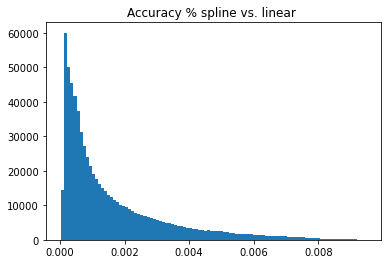

In [59]:
fig = plt.figure()

fig.patch.set_facecolor('white')

plot = plt.hist(mainData, bins=100)

plt.title("Accuracy % spline vs. linear ")


In [60]:

mean = statistics.mean(mainData)
stdev = statistics.stdev(mainData)
median = statistics.median(mainData)

print("MEAN:", mean)
print("STDEV:", stdev)
print("MEDIAN:", median)
print("MINIMUM:", min(mainData))
print("MAXIMUM:", max(mainData))

MEAN: 0.0016211265540896714
STDEV: 0.0016785839647129389
MEDIAN: 0.0009653076914118014
MINIMUM: 3.490627605245515e-05
MAXIMUM: 0.009467970353336382
